# 1. Imports and config

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
pd.set_option('display.max_rows', 200)

In [2]:
train_data = pd.read_csv('./data/train.csv', index_col='id')

In [3]:
test_data = pd.read_csv('./data/test.csv', index_col='id')

In [4]:
train_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [5]:
test_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,
250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,1.11394,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,1.09695,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,1.15222,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,1.20157,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,1.16807,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


# 2. Exploratory Data Analysis

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 250000 to 399999
Data columns (total 100 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f0      150000 non-null  float64
 1   f1      150000 non-null  int64  
 2   f2      150000 non-null  float64
 3   f3      150000 non-null  float64
 4   f4      150000 non-null  float64
 5   f5      150000 non-null  float64
 6   f6      150000 non-null  float64
 7   f7      150000 non-null  float64
 8   f8      150000 non-null  float64
 9   f9      150000 non-null  float64
 10  f10     150000 non-null  float64
 11  f11     150000 non-null  float64
 12  f12     150000 non-null  float64
 13  f13     150000 non-null  float64
 14  f14     150000 non-null  float64
 15  f15     150000 non-null  float64
 16  f16     150000 non-null  int64  
 17  f17     150000 non-null  float64
 18  f18     150000 non-null  float64
 19  f19     150000 non-null  float64
 20  f20     150000 non-null  float64
 21  f21 

In [7]:
test_data.shape

(150000, 100)

In [8]:
test_data.size

15000000

In [9]:
test_data.ndim

2

In [10]:
test_data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.513137,51.612380,0.108166,0.047793,3567.849290,8.189529,163.303236,0.379849,16.626872,1.190402,...,0.582965,4858.089360,22.590537,2.028026,0.079295,1.565588,2.422223,0.537009,1.575402,8.045628
std,0.307512,42.662212,1.338636,0.790894,6045.626929,5.443633,181.799298,0.812515,99.813298,0.099975,...,0.445033,8497.126809,14.838069,0.898257,0.590101,9.268188,0.894294,0.226024,0.645402,5.642812
min,-0.064172,-17.000000,-7.952920,-1.491030,-7801.580000,-3.097580,-39.020100,-4.062280,-496.326000,0.929603,...,-0.466885,-12183.200000,-4.134800,0.120638,-2.013430,-24.337800,-1.056300,0.010615,-0.673333,-0.762355
25%,0.254897,18.000000,-0.615063,-0.718730,161.797000,4.129198,27.774750,-0.024041,-17.780300,1.132580,...,0.282301,73.567275,11.585500,1.470310,-0.408236,-4.015442,1.910508,0.359924,1.216300,3.719902
50%,0.516855,41.000000,0.253162,0.003786,935.088500,7.467945,90.090350,0.622288,8.433805,1.170310,...,0.483258,1054.480000,19.939150,1.660235,0.215228,0.811492,2.341185,0.530720,1.449735,7.191640
75%,0.778300,76.000000,0.759430,0.761793,4076.672500,11.016600,239.953000,0.936772,55.053075,1.219200,...,0.770184,5613.215000,32.208850,2.308523,0.502962,6.218857,2.918890,0.708449,1.895472,11.018700
max,1.072210,270.000000,9.931070,1.670420,38434.400000,34.533000,943.297000,4.183330,466.535000,1.711020,...,3.347080,54417.900000,80.209000,5.421360,1.920450,42.504100,5.583770,1.102790,4.472940,33.686300


In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

### Since there are no features to encode or otherwise manipulate, we can start looking for relationships in the dependent and independent variables

In [23]:
# Find all correlations with the score and sort
correlations_test_data = train_data.corr()['loss'].sort_values()

# print most negative correlations
print(correlations_test_data.head(15), '\n')

# print most positive correlations
print(correlations_test_data.tail(15), '\n')

f25   -0.030164
f52   -0.026566
f58   -0.023370
f66   -0.022424
f96   -0.020655
f3    -0.018853
f73   -0.014835
f63   -0.013990
f43   -0.013676
f41   -0.013031
f47   -0.012897
f69   -0.012869
f21   -0.012347
f88   -0.012331
f23   -0.012252
Name: loss, dtype: float64 

f18     0.013782
f81     0.013784
f32     0.014113
f84     0.015250
f64     0.015482
f77     0.015697
f65     0.016285
f53     0.016576
f70     0.017387
f31     0.019942
f74     0.021610
f28     0.022780
f46     0.023828
f13     0.025730
loss    1.000000
Name: loss, dtype: float64 



### check out the pair plot for the 5 most correlated independent variables

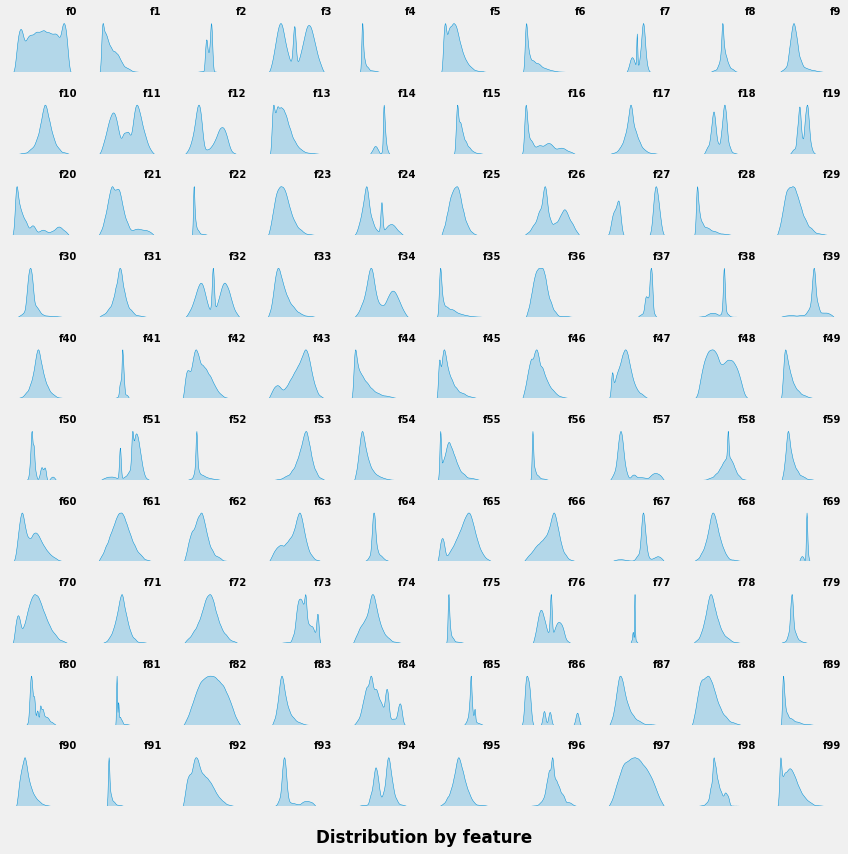

In [34]:
fig, axes = plt.subplots(10,10,figsize=(12, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    sns.kdeplot(data=train_data, x=f'f{idx}', 
                fill=True, 
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Distribution by feature', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

### Check for colinear features and remove

Text(0.5, 1.0, 'Feature46 vs. Feature28, R = -0.0100')

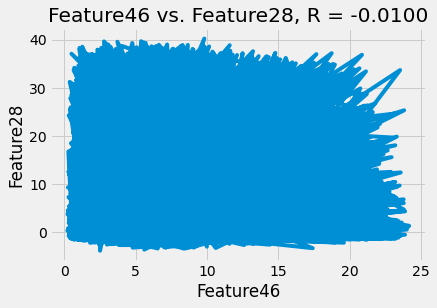

In [32]:
plot_data = test_data[['f46', 'f28']]

plt.plot(plot_data['f46'], plot_data['f28'])
plt.xlabel('Feature46'); plt.ylabel('Feature28')
plt.title('Feature46 vs. Feature28, R = %0.4f' % np.corrcoef(test_data[['f46', 'f28']].dropna(), rowvar=False)[0][1])

In [ ]:
# need to iterate, but if I had to guess 